In [1]:
'''Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years'''

'Prepare a prediction model for profit of 50_startups data.\nDo transformations for getting better predictions of profit and\nmake a table containing R^2 value for each prepared model.\n\nR&D Spend -- Research and devolop spend in the past few years\nAdministration -- spend on administration in the past few years\nMarketing Spend -- spend on Marketing in the past few years\nState -- states from which data is collected\nProfit  -- profit of each state in the past few years'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing

In [4]:
data=pd.read_csv("50_Startups.csv")
data.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df = pd.get_dummies(data,["State"])
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [7]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [8]:
df = df.drop("State_New York",axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [ ]:
#scatterplots visualizations

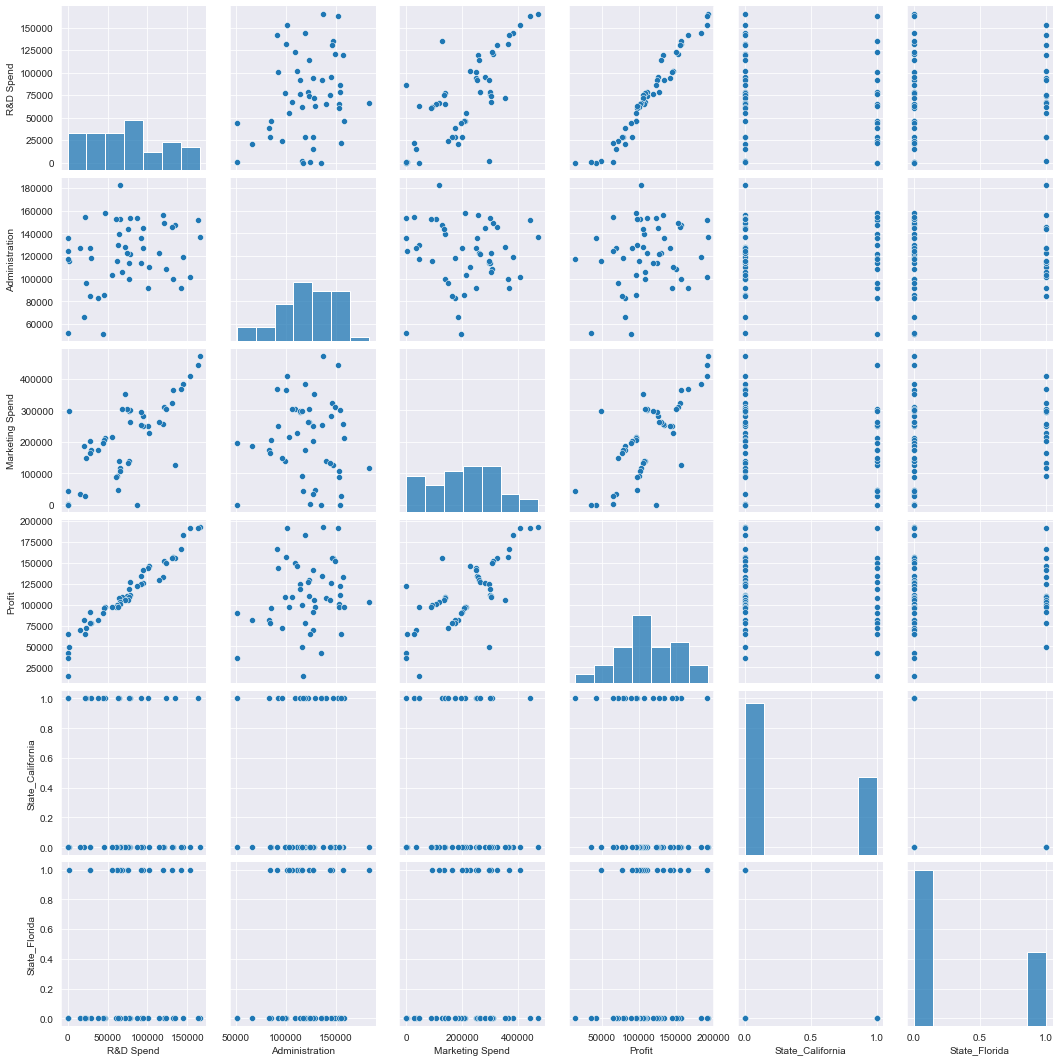

In [9]:
import seaborn as sns 
sns.set_style(style="darkgrid")
sns.pairplot(df)

In [11]:
df1=df.rename({"R&D Spend":"rd",
                   "Administration":"admin",
                   "Marketing Spend":"ms","State_California":"sc","State_Florida":"sf"},axis=1)

In [12]:
df1.head(2)

,rd,admin,ms,Profit,sc,sf
0,165349.2,136897.80,471784.10,192261.83,0,0
1,162597.7,151377.59,443898.53,191792.06,1,0


In [13]:
df1.corr()

,rd,admin,ms,Profit,sc,sf
rd,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711
admin,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493
ms,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244
sc,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366
sf,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000


In [14]:
model=smf.ols("Profit~rd+admin+ms+sc+sf",data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           1.34e-27
Time:                        15:53:04   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
rd             0.8060      0.046     17.369      0.000       0.712       0.900
admin         -0.0270      0.052     -0.517      0.608      -0.132       0.078
ms             0.0270      0.017      1.574      0.123      -0.008       0.062
sc            41.8870   3256.039      0.013      0.990   -6520.229    6604.003
sf           240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

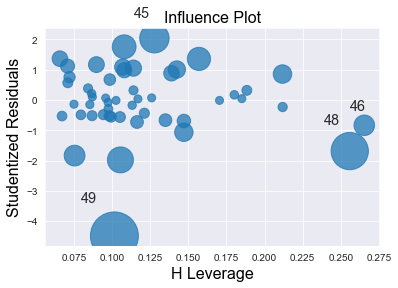

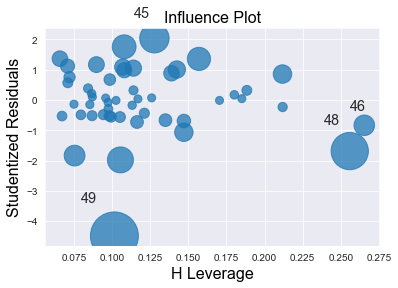

In [15]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)

In [16]:
df2=df1.drop(df1.index[49],axis=0)
df2

,rd,admin,ms,Profit,sc,sf
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1
5,131876.90,99814.71,362861.36,156991.12,0,0
6,134615.46,147198.87,127716.82,156122.51,1,0
7,130298.13,145530.06,323876.68,155752.60,0,1
8,120542.52,148718.95,311613.29,152211.77,0,0
9,123334.88,108679.17,304981.62,149759.96,1,0


In [17]:
m1=smf.ols("Profit~admin+rd+ms+sc+sf",data=df2).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           2.51e-29
Time:                        15:56:07   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.143e+04   5812.919      8.847      0.000    3.97e+04    6.31e+04
admin         -0.0220      0.044     -0.505      0.616      -0.110       0.066
rd             0.7836      0.039     20.056      0.000       0.705       0.862
ms             0.0258      0.014      1.804      0.078      -0.003       0.055
sc          1954.0177   2751.932      0.710      0.482   -3595.783    7503.818
sf           389.7935   2788.050      0.140      0.889   -5232.845    6012.432
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#residual analysis

In [18]:
res=m1.resid
res

0      2103.543815
1      2874.720587
2     10694.367621
3     11066.868378
4     -4423.099177
5     -4942.775088
6     -2796.090299
7     -3320.587404
8      1559.651080
9     -5744.777225
10    10967.282206
11     7567.444947
12    12572.633164
13     5303.686160
14   -16374.515563
15   -15306.706646
16     8335.604545
17    -4328.626135
18    -4542.513614
19     7014.838789
20      138.854192
21    -5890.450112
22    -4572.189923
23    -1539.378722
24    -4687.432233
25     2865.472822
26    -5395.474562
27    -9223.381138
28      681.678987
29    -1224.630972
30     -262.046827
31     -762.501777
32    -3982.146650
33    -1793.100995
34     4984.357361
35     5564.445851
36    14037.325081
37    -1920.986205
38    10620.728755
39    -5278.728239
40      477.979569
41     1745.939803
42    -2108.753231
43     8071.376720
44    -2879.569187
45    15402.088726
46    -8476.320071
47    -7837.069144
48   -15037.038014
dtype: float64

In [19]:
res.mean() #it is near 0 but not equal to 0

1.6684023240505129e-07

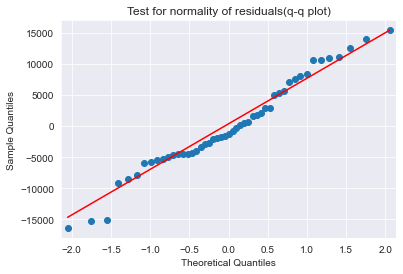

In [22]:
import statsmodels.api as sm
qqplot=sm.qqplot(res,line="q") 
plt.title("Test for normality of residuals(q-q plot)")
plt.show()

In [23]:
list(np.where(m1.resid<-15000))

[array([14, 15, 48], dtype=int64)]

In [ ]:
#residual plot for homosceasity

In [26]:
def get_Stardardized_values(vals):
    return(vals - vals.mean())/(vals.std())

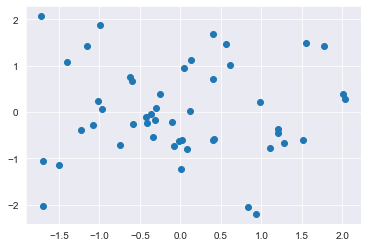

In [27]:
plt.scatter(get_Stardardized_values(m1.fittedvalues),
            get_Stardardized_values(m1.resid))

In [ ]:
#residual vs Regressor

eval_env: 1


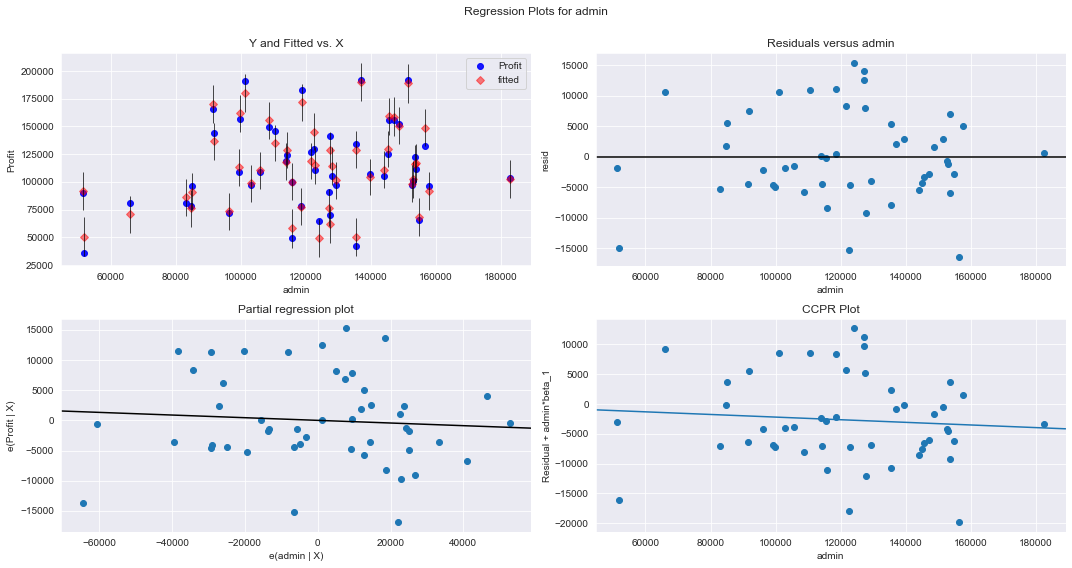

In [28]:
fig= plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(m1,'admin',fig=fig)
plt.show()

eval_env: 1


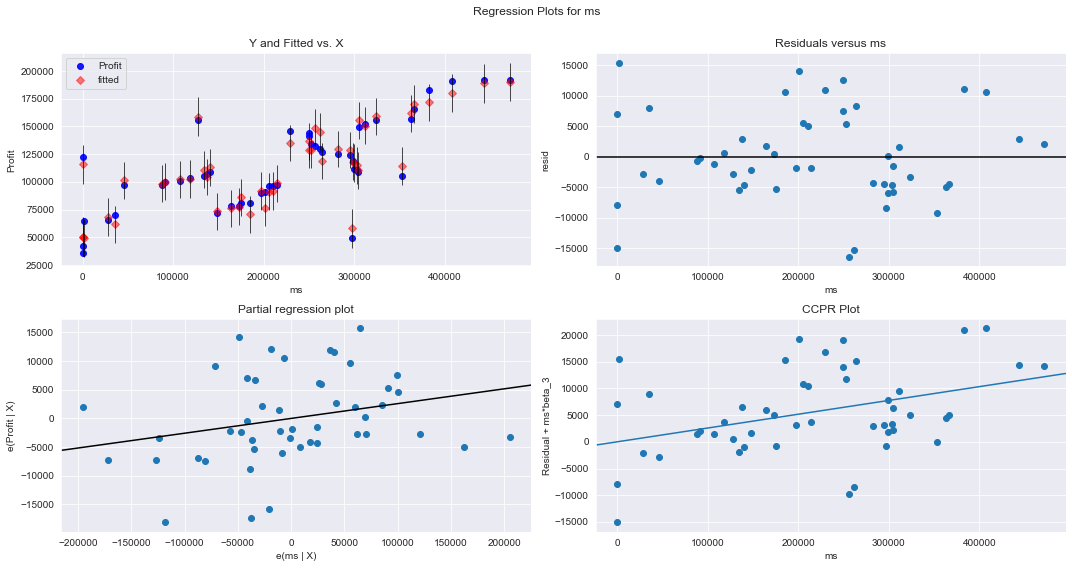

In [29]:
fig= plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(m1,'ms',fig=fig)
plt.show()

eval_env: 1


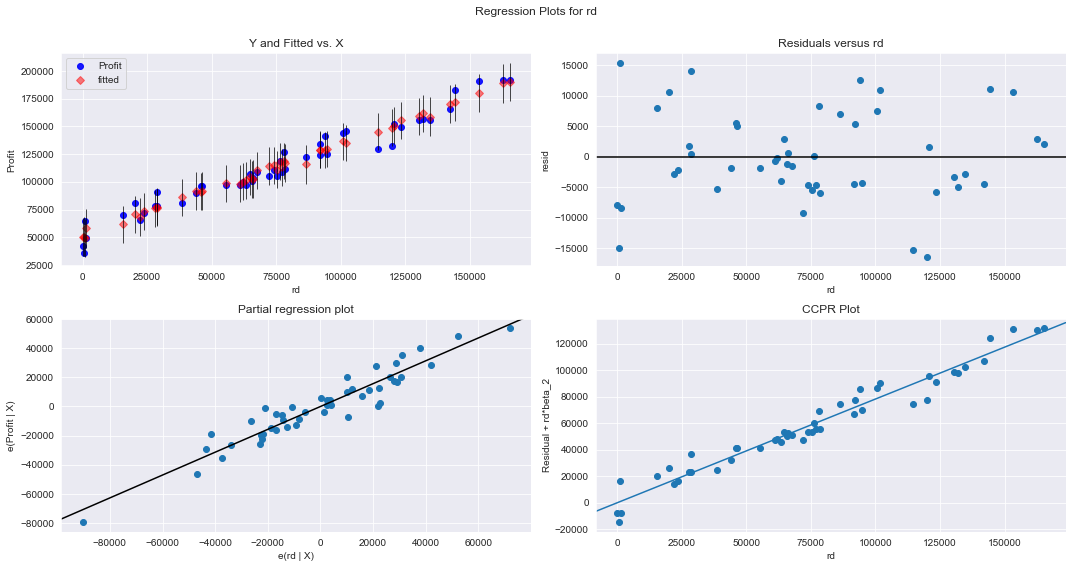

In [30]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(m1,'rd',fig=fig)
plt.show()

eval_env: 1


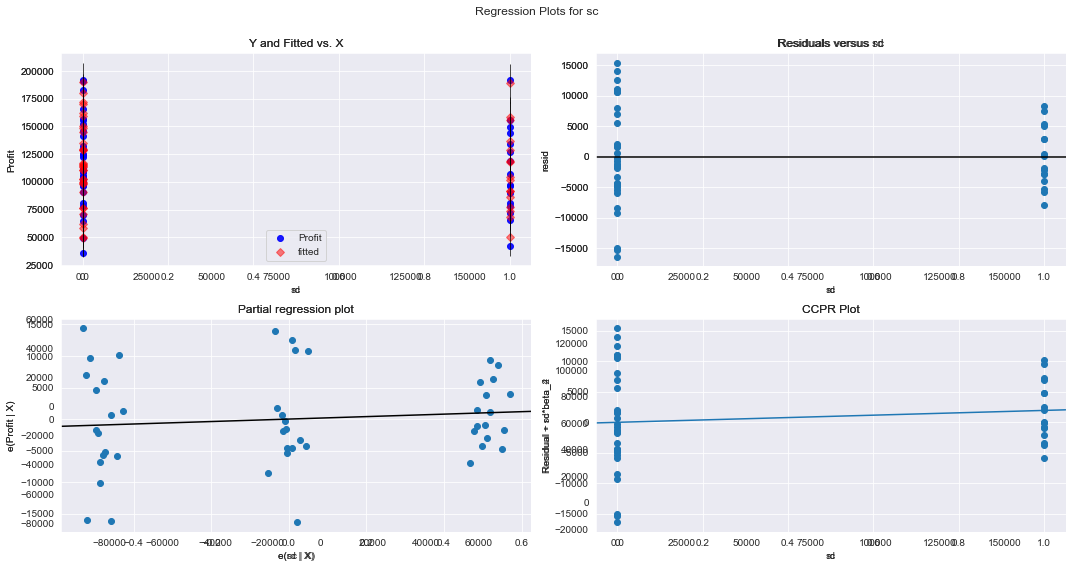

In [31]:
sm.graphics.plot_regress_exog(m1,"sc",fig=fig)

eval_env: 1


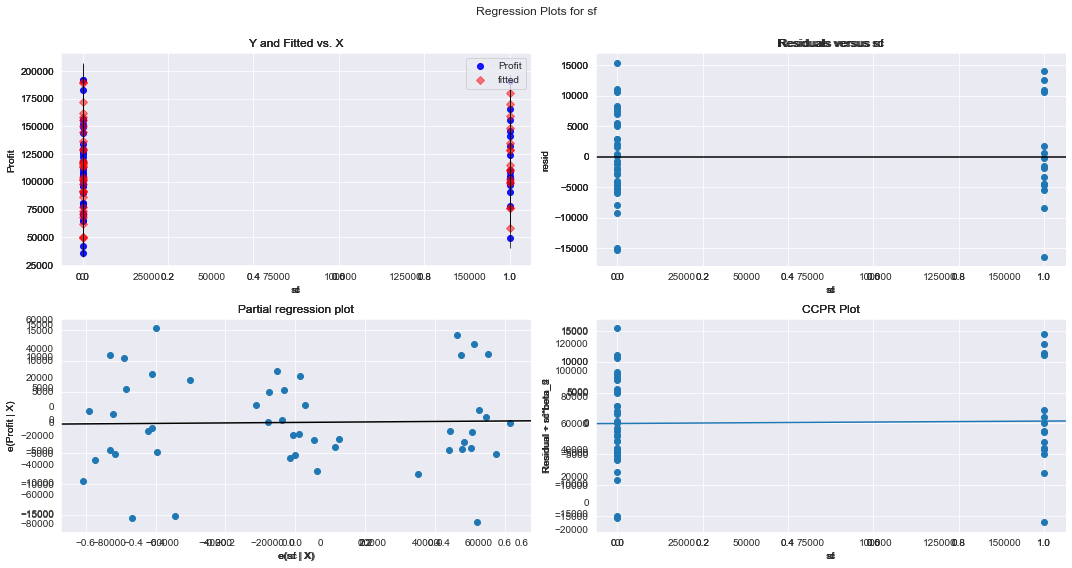

In [32]:
sm.graphics.plot_regress_exog(m1,"sf",fig=fig)

In [ ]:
#model deletion diagnostic

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence =m1.get_influence()
(c,_)=model_influence.cooks_distance

In [34]:
c

array([3.03867206e-03, 6.34213501e-03, 6.10907745e-02, 4.89969621e-02,
       1.08296207e-02, 9.96640531e-03, 7.18257664e-03, 3.43906612e-03,
       7.71896400e-04, 1.16791482e-02, 3.50252773e-02, 2.11128062e-02,
       3.19794651e-02, 6.51681649e-03, 9.52677666e-02, 5.59931284e-02,
       1.59297138e-02, 5.24377171e-03, 4.27707492e-03, 4.50057058e-02,
       5.55348982e-06, 1.67935282e-02, 5.26498586e-03, 6.49142710e-04,
       7.10541515e-03, 1.94064299e-03, 9.56819087e-03, 4.61390479e-02,
       3.35515812e-04, 4.81929683e-04, 2.77054838e-05, 1.99386901e-04,
       6.44240628e-03, 7.58291881e-04, 1.32227858e-02, 1.00900380e-02,
       7.27039884e-02, 2.85158478e-03, 6.73063867e-02, 9.56592291e-03,
       6.78841259e-05, 1.20050726e-03, 1.37273222e-03, 2.39875939e-02,
       4.04204676e-03, 1.10116060e-01, 9.62426496e-02, 2.92982414e-02,
       2.84116205e-01])

Text(0, 0.5, 'cooks distance')

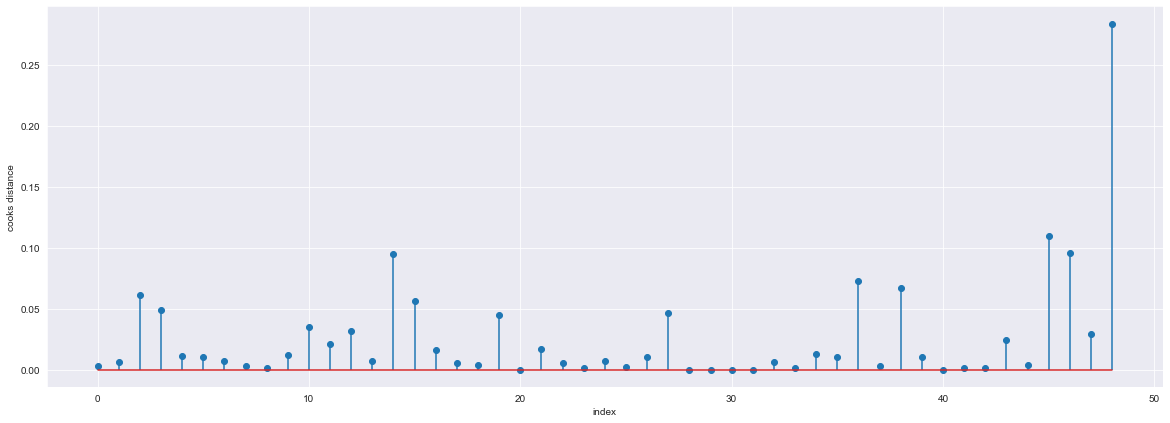

In [36]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df2)),np.round(c,3))
plt.xlabel("index")
plt.ylabel("cooks distance")

In [37]:
np.argmax(c),np.max(c)

(48, 0.28411620500588414)

In [38]:
new_data=df2.drop(df2.index[[48]],axis=0).reset_index()

In [39]:
new_data.head()

,index,rd,admin,ms,Profit,sc,sf
0,0,165349.20,136897.80,471784.10,192261.83,0,0
1,1,162597.70,151377.59,443898.53,191792.06,1,0
2,2,153441.51,101145.55,407934.54,191050.39,0,1
3,3,144372.41,118671.85,383199.62,182901.99,0,0
4,4,142107.34,91391.77,366168.42,166187.94,0,1


In [41]:
data2=new_data.copy()
data2.head()

,index,rd,admin,ms,Profit,sc,sf
0,0,165349.20,136897.80,471784.10,192261.83,0,0
1,1,162597.70,151377.59,443898.53,191792.06,1,0
2,2,153441.51,101145.55,407934.54,191050.39,0,1
3,3,144372.41,118671.85,383199.62,182901.99,0,0
4,4,142107.34,91391.77,366168.42,166187.94,0,1


In [42]:
final_m=smf.ols("Profit~rd+admin+ms+sc+sf",data=data2).fit()
final_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     217.6
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           7.02e-29
Time:                        16:14:02   Log-Likelihood:                -493.23
No. Observations:                  48   AIC:                             998.5
Df Residuals:                      42   BIC:                             1010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.872e+04   6363.927      9.228      0.000    4.59e+04    7.16e+04
rd             0.7888      0.037     21.160      0.000       0.714       0.864
admin         -0.0621      0.045     -1.381      0.174      -0.153       0.029
ms             0.0179      0.014      1.275      0.209      -0.010       0.046
sc           665.7875   2678.779      0.249      0.805   -4740.208    6071.783
sf          -484.4021   2681.751     -0.181      0.858   -5896.395    4927.591
==============================================================================
Omnibus:                        0.267   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.453
Skew:                           0.108   Prob(JB):                        0.797
Kurtosis:                       2.576   Cond. No.                     1.69e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
final_m.rsquared,final_m.aic

(0.9628371102993712, 998.4621953724801)

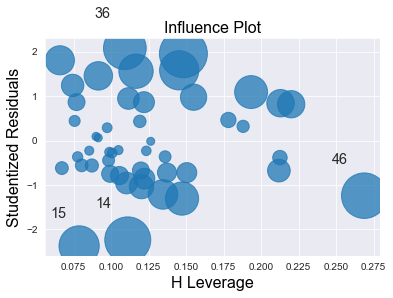

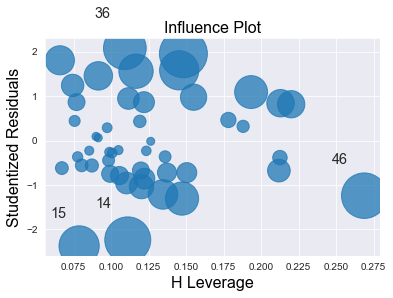

In [44]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(final_m)

In [ ]:
#predict for new data

In [45]:
new_dataa=pd.DataFrame({'rd':162597.7,'admin':151377.59,'ms':443898.53,"sc":1,"sf":0},index=[1])

In [46]:
new_dataa

,rd,admin,ms,sc,sf
1,162597.7,151377.59,443898.53,1,0


In [47]:
pred_y=final_m.predict(new_dataa)

In [48]:
pred_y

1    186183.370112
dtype: float64

In [50]:
data2["predicted"] = final_m.fittedvalues
data2["erro"]=data2["Profit"]-data2["predicted"]
data2.head()

,index,rd,admin,ms,Profit,sc,sf,predicted,erro
0,0,165349.20,136897.80,471784.10,192261.83,0,0,189087.074698,3174.755302
1,1,162597.70,151377.59,443898.53,191792.06,1,0,186183.370112,5608.689888
2,2,153441.51,101145.55,407934.54,191050.39,0,1,180288.581217,10761.808783
3,3,144372.41,118671.85,383199.62,182901.99,0,0,172087.545967,10814.444033
4,4,142107.34,91391.77,366168.42,166187.94,0,1,171206.768166,-5018.828166
